# AB_STATS


Calculate average values per lightcurve per segment for the combined r-band LCs, to find out what are their properties (mostly, Nepochs, errors, etc,..... ) . 


In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd 
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import unique
from astropy.table import  hstack
from astropy.table import  vstack
from astropy.table import Column
from astropy.table import join
import celerite
import modules as mod
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18


In [32]:
for seg in np.unique(lc_real['survey'].data):
    print(seg)

crts
ps1
ptf
sdss


In [35]:
simDir = '../data_products/Simulated_LC_DRW_obs/'

# combined real light curves 
realDir = '../data_products/Combined_LC/'
lightcurve_list =  os.listdir(realDir)

stats = {}
segs = ['sdss', 'ps1', 'ptf', 'crts']
for seg in segs: 
    stats[seg] = {'lcname':[], 'medErr':[], 'meanErr':[], }
  
for i in range(len(lightcurve_list)):
    lcname = lightcurve_list[i]
    lc_real = Table.read(realDir+lcname, format='ascii')
    #lc_real.sort('mjd')

    # keep only the first row if there are two that 
    # have the same MJD ...
    #lc_real = unique(lc_real, keys='mjd', keep='first')
    lc_real.rename_column('originSurvey', 'survey')

    #lc_sim = Table.read(simDir + lcname , format='ascii')
    segs = np.unique(lc_real['survey'].data)
    for seg in segs:  
        lc = lc_real[lc_real['survey'] == seg]
        stats[seg]['lcname'].append(lcname)
        stats[seg]['medErr'].append(np.median(lc['magerr']))
        stats[seg]['meanErr'].append(np.mean(lc['magerr']))
    if i % 500 == 0 : print(i)
fname = 'real_combined-r_band_sdss_ps1_stats'
np.save(fname, stats)

0


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000


In [36]:
fname = 'real_combined-r_band_sdss_ps1_stats.npy'
r = np.load(fname).item()




 

In [39]:
seg

['sdss', 'ps1', 'ptf', 'crts']

In [43]:
# convert a dict to a table, choosing relevant parts... 
seg = list(r.keys())

d1 = pd.DataFrame.from_dict(r[seg[0]])
t1 = Table.from_pandas(d1)

d2 = pd.DataFrame.from_dict(r[seg[1]])
t2 = Table.from_pandas(d2)

s12 =  join(t1,t2, keys='lcname', table_names=[seg[0] ,seg[1]])


d3 = pd.DataFrame.from_dict(r[seg[2]])
t3 = Table.from_pandas(d3)

d4 = pd.DataFrame.from_dict(r[seg[3]])
t4 = Table.from_pandas(d4)

s34 =  join(t3,t4, keys='lcname', table_names=[seg[2] ,seg[3]])

sall = join(s12,s34, keys='lcname')

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


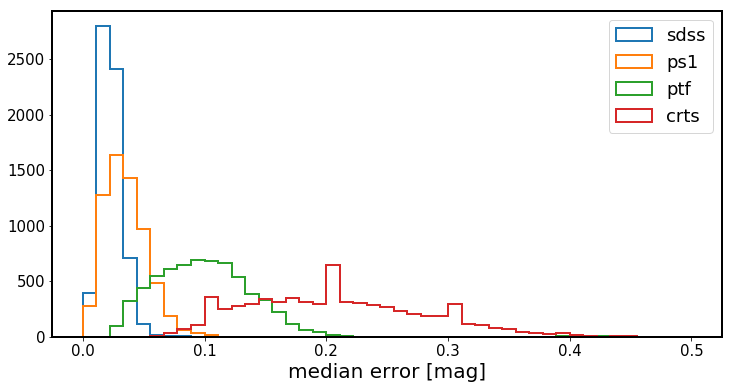

In [61]:
%matplotlib inline
fig,ax = plt.subplots(1,1,figsize=(12,6))
for seg in list(r.keys()):
    ax.hist(sall['medErr_'+seg], range = (0,0.5),lw=2, label=seg, bins=45,
           histtype='step')
ax.legend(fontsize=18)
ax.set_xlabel('median error [mag]')
plt.savefig('real_combined-r_band_sdss_ps1_stats.png', bbox_inches='tight')